# Group 29 Project Proposal: An Investigation on Distinguishing the Presence or Absence of Heart Disease

<i>Word Count: 493</i>

## Introduction

According to the Centers for Disease Control and Prevention, heart disease is any condition that affects the structure or function of the heart, often caused by high blood pressure, high cholesterol, or smoking. In the USA, heart disease-related complications are the leading cause of death - averaging around 659,000 deaths each year.

To investigate the main factors behind heart disease, I posit the question: "<b>How accurate is KNN classification at detecting the presence of heart disease?</b>" using a <i>KNN classification</i> on the <i>Processed Cleveland Heart Disease Data Set</i>. This dataset contains 14 variables and 303 observations.

## Preliminary Exploratory Data Analysis

In [11]:
library(tidyverse)
library(tidymodels)
# for data reproducibility
set.seed(3)
# suppress global warnings for readability
options(warn = -1)

First, I upload the data file into Jupyter. The data frame is relatively tidy, but I perform some wrangling improvements:
- Adding variable names 
- Converting values > 1 in the diagnosis variable to be 1 (as specified in the dataset's notes)
- Converting the diagnosis variable to become a factor
- Converting the diagnosis values (0, 1) to be "<b>Absence</b>" and "<b>Presence</b>"
- Converting "?" values to be NAs
- Removing 8 categorical variables
- Removing 6 observations with NAs

In [12]:
heart_disease <- read_csv("data/processed.cleveland.data",
                          col_names = c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "electrocardio_results", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_peak_slope", "major_vessels", "thal", "diagnosis"))

heart_disease <- heart_disease 

heart_disease <- heart_disease %>%
    mutate(diagnosis = as.factor(ifelse(diagnosis == 0, "Absence", "Presence")))

heart_disease[heart_disease == "?"] <- NA

heart_disease <- na.omit(heart_disease)

heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_pressure = col_double(),
  cholesterol = col_double(),
  fasting_blood_sugar = col_double(),
  electrocardio_results = col_double(),
  max_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  ST_depression = col_double(),
  ST_peak_slope = col_double(),
  major_vessels = col_character(),
  thal = col_character(),
  diagnosis = col_double()
)



age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardio_results,max_heart_rate,exercise_induced_angina,ST_depression,ST_peak_slope,major_vessels,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Absence
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Presence
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Presence
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Absence
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Absence
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Absence
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,Presence
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,Absence
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,Presence


I split the data into training and testing data. 

In [13]:
heart_disease_split <- initial_split(heart_disease, prop = 0.8, strata = diagnosis)

heart_disease_train <- training(heart_disease_split)
heart_disease_train <- heart_disease_train %>%
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression, diagnosis)
heart_disease_train

heart_disease_test <- testing(heart_disease_split)

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,Absence
67,160,286,108,1.5,Presence
67,120,229,129,2.6,Presence
37,130,250,187,3.5,Absence
41,130,204,172,1.4,Absence
56,120,236,178,0.8,Absence
62,140,268,160,3.6,Presence
53,140,203,155,3.1,Presence
57,140,192,148,0.4,Absence


### Number of Observations Per Class

In [14]:
heart_disease_proportions <- heart_disease_train %>%
    group_by(diagnosis) %>%
    summarize(n = n()) %>%
    mutate(percent = 100 * n / nrow(heart_disease_train))

heart_disease_proportions

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
Absence,129,53.9749
Presence,110,46.0251


### Mean Predictor Values
- NOTE: see the "Methods" section for my predictor choice reasoning

In [15]:
heart_disease_predictors <- heart_disease_train %>%
    select(-diagnosis) %>%
    map_df(mean)

heart_disease_predictors

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.53556,131.8536,247.159,149.8996,1.040167


### Number of Missing Observations

In [16]:
naCols <- colSums(is.na(heart_disease_train))

print(naCols)

                   age resting_blood_pressure            cholesterol 
                     0                      0                      0 
        max_heart_rate          ST_depression              diagnosis 
                     0                      0                      0 


### Visualizations

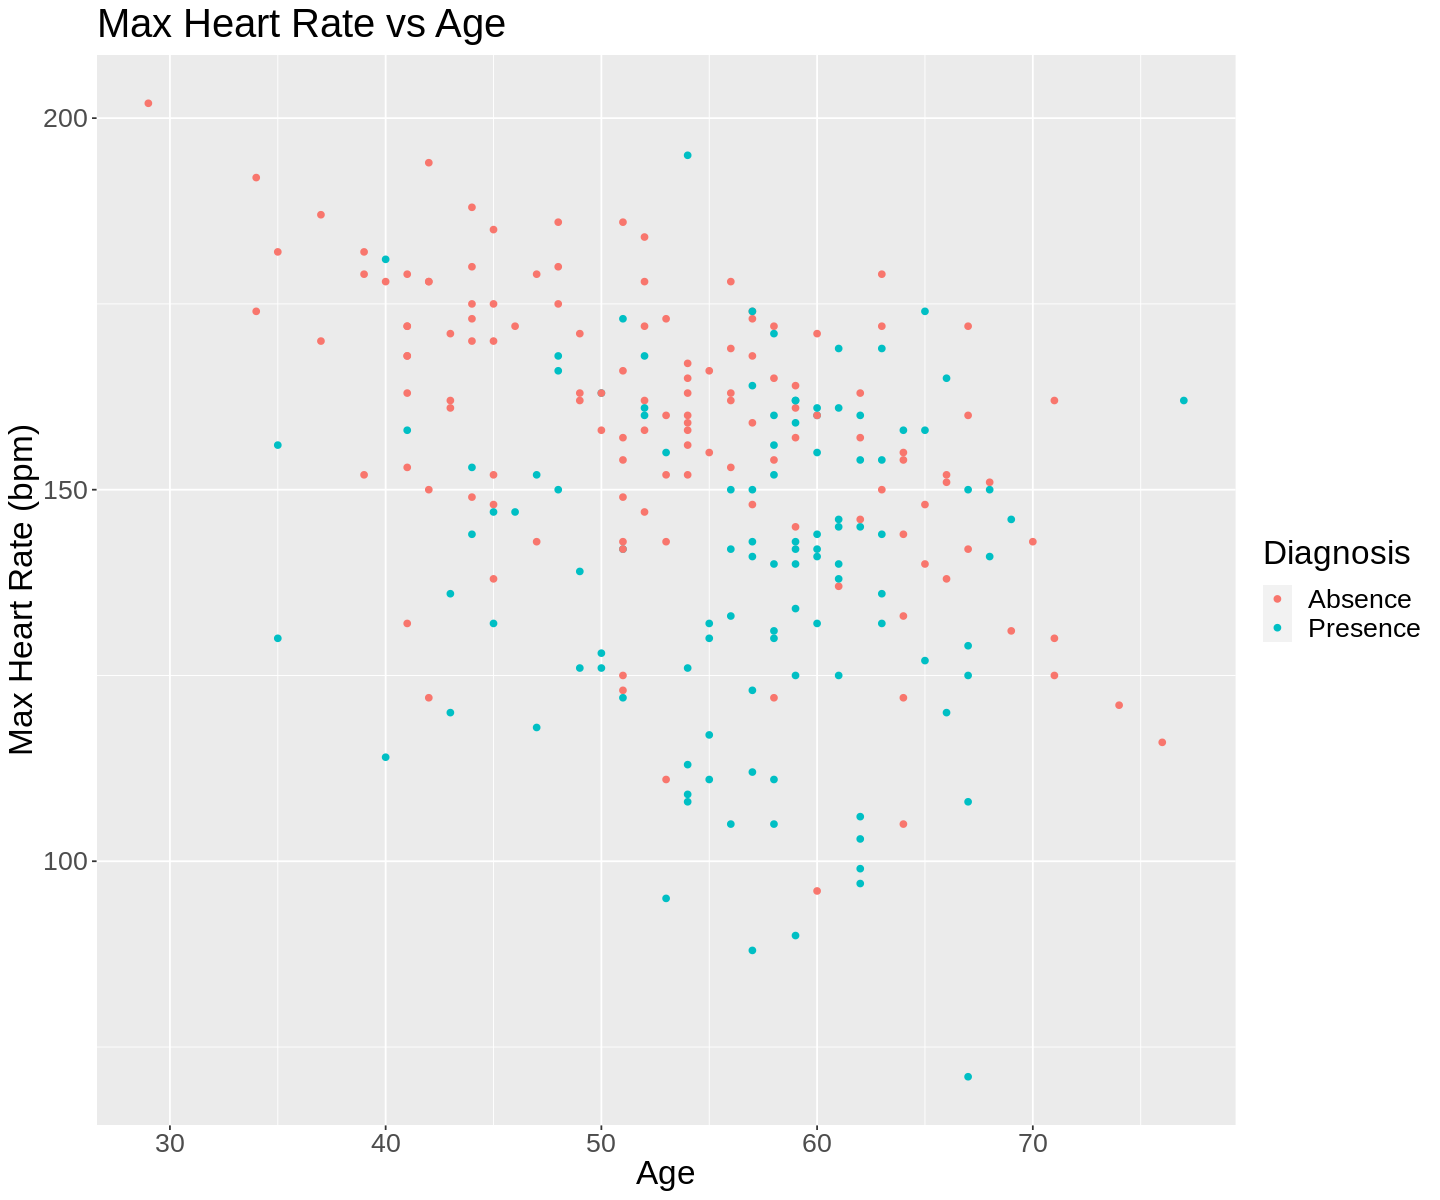

In [19]:
options(repr.plot.width = 12, repr.plot.height = 10)
blood_sugar_heart_rate_plot <- heart_disease_train %>%
    ggplot(aes(x = age, y = max_heart_rate, color = diagnosis)) +
        geom_point() + 
        labs(x = "Age", y = "Max Heart Rate (bpm)", color = "Diagnosis") + 
        ggtitle("Max Heart Rate vs Age") +
        theme(text = element_text(size = 20))

blood_sugar_heart_rate_plot

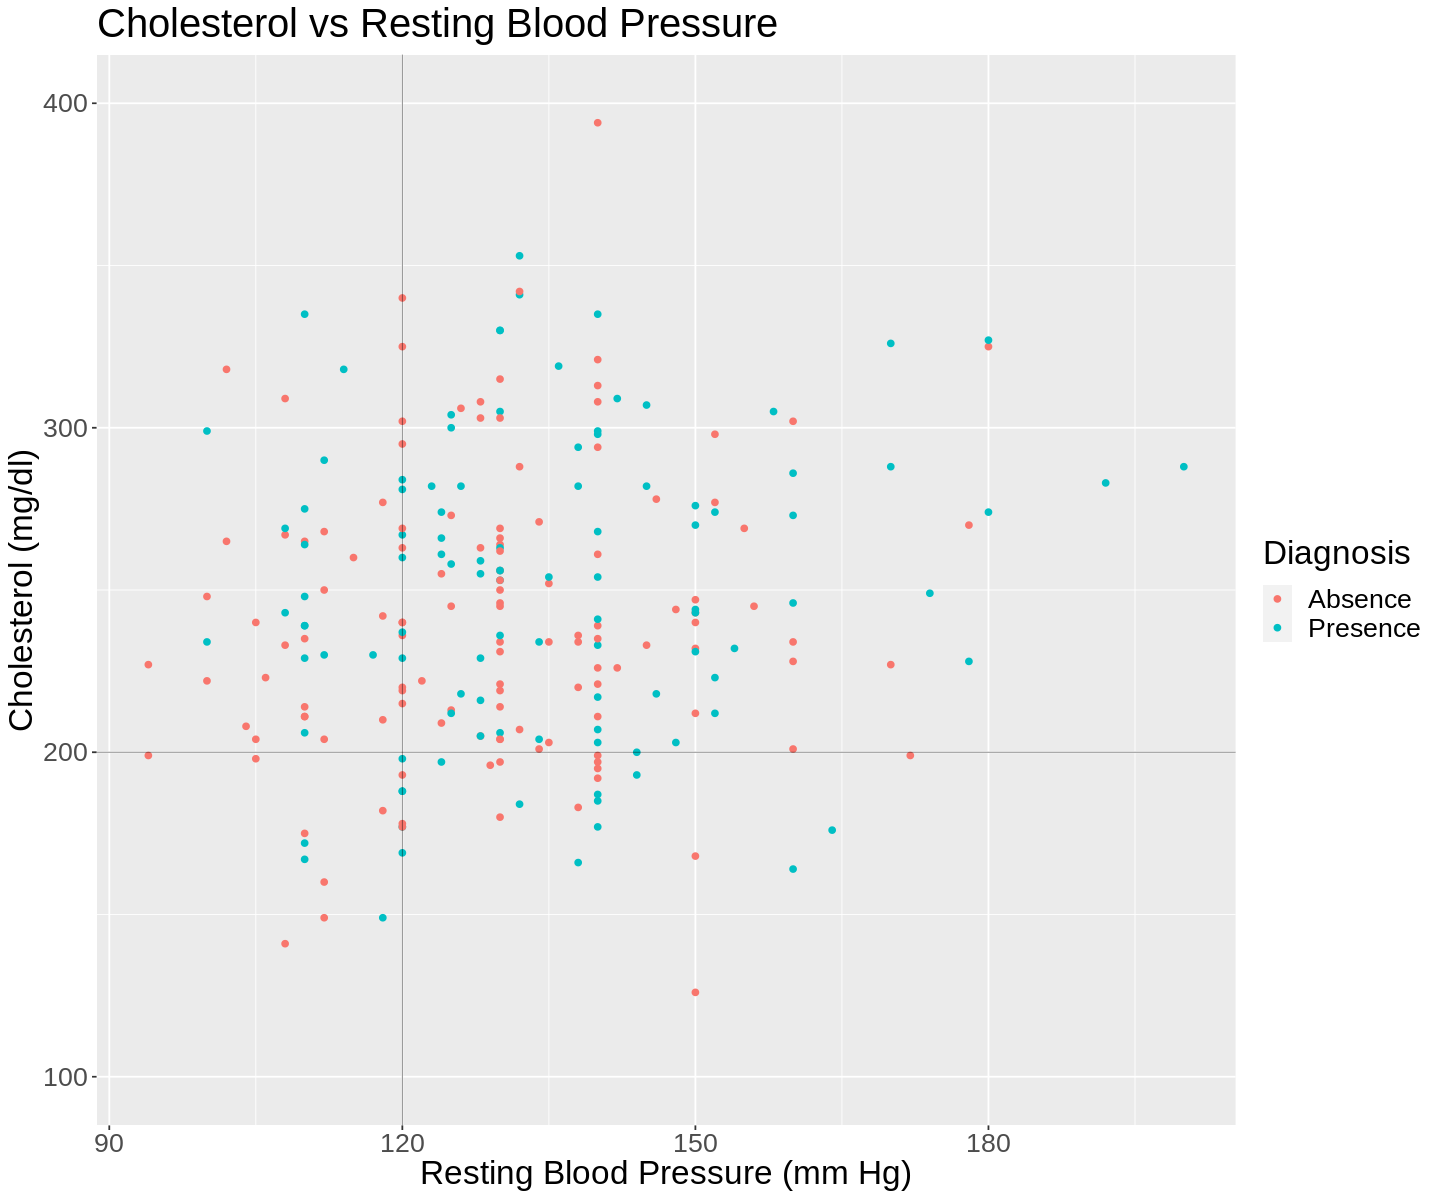

In [20]:
options(repr.plot.width = 12, repr.plot.height = 10)

heart_disease_plot <- heart_disease_train %>%
    ggplot(aes(x = resting_blood_pressure, y = cholesterol, color = diagnosis)) +
        geom_point() +
        labs(x = "Resting Blood Pressure (mm Hg)", y = "Cholesterol (mg/dl)", color = "Diagnosis") +
        theme(text = element_text(size = 20)) + 
        ggtitle("Cholesterol vs Resting Blood Pressure") +
        geom_hline(yintercept = 200, linetype = "solid", size = 0.25, alpha = 0.5) +
        geom_vline(xintercept = 120, linetype = "solid", size = 0.25, alpha = 0.5) +
        ylim(100, 400) 
# ylim limits y-axis values, excluding some outliers
# vline & hline represent the "healthy" blood pressure and cholesterol levels according to the Centers for Disease Control and Prevention
# (blood pressure < 120 mm Hg, and cholesterol levels < 200 mg/dl)  

heart_disease_plot

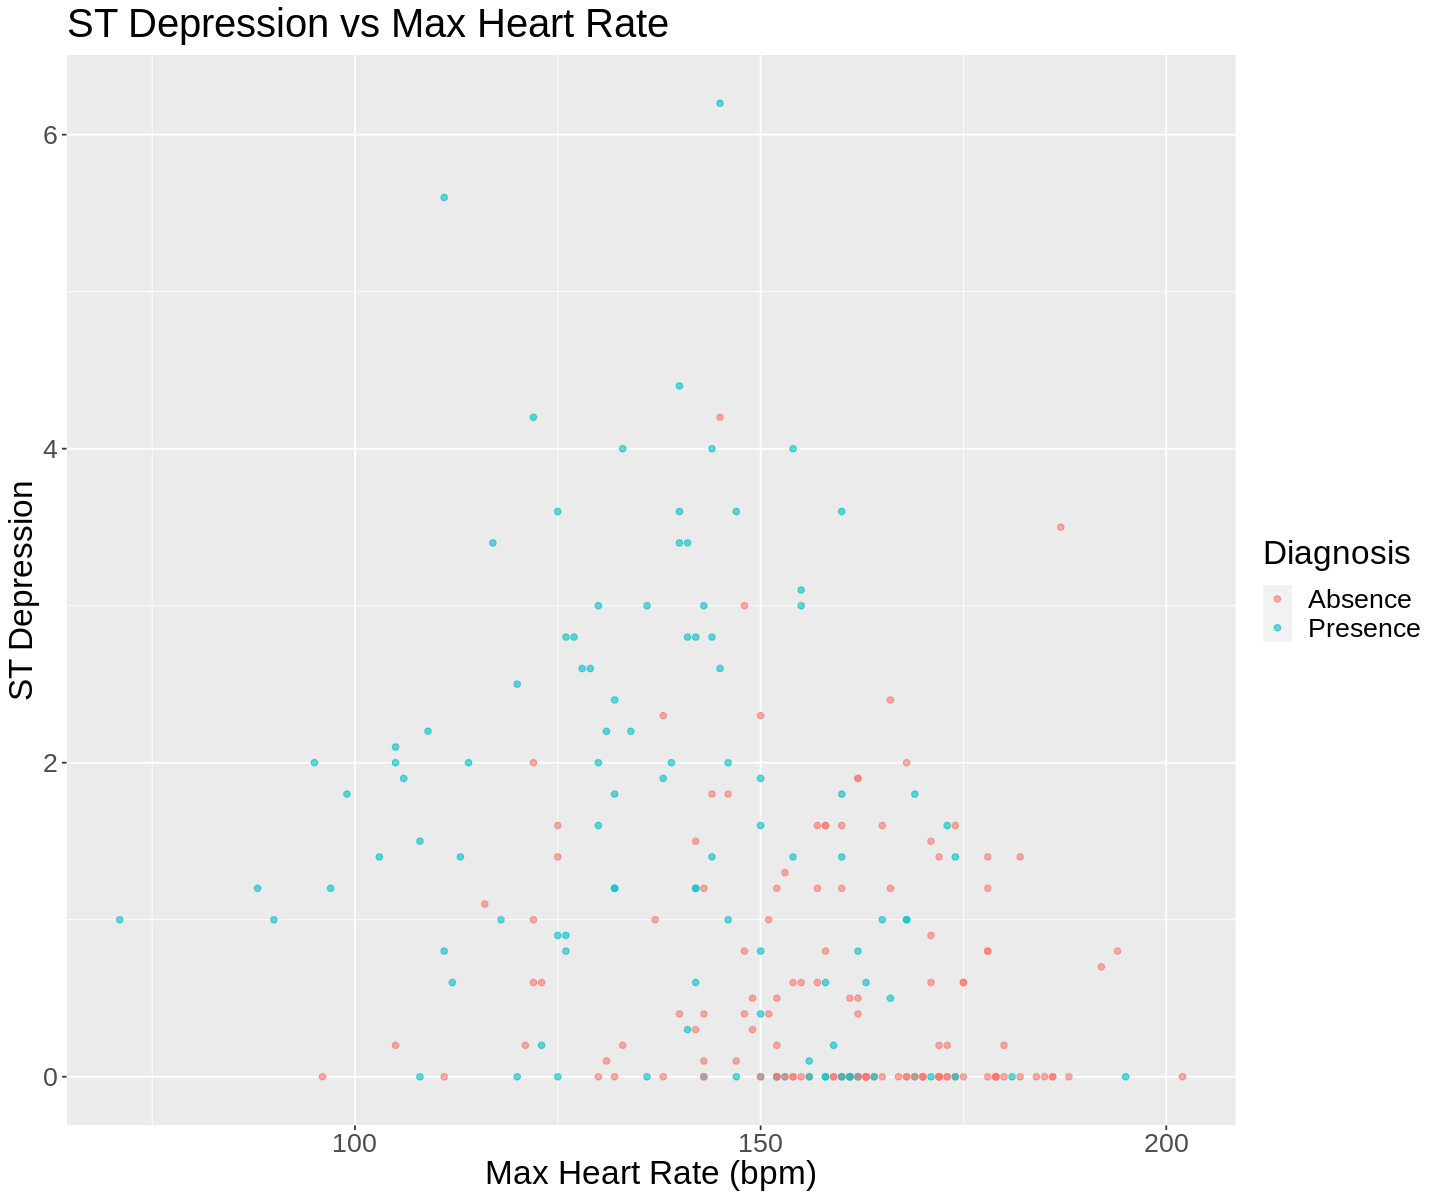

In [21]:
options(repr.plot.width = 12, repr.plot.height = 10)
ST_heart_rate_plot <- heart_disease_train %>%
    ggplot(aes(x = max_heart_rate, y = ST_depression, color = diagnosis)) +
        geom_point(alpha = 0.6) + 
        labs(x = "Max Heart Rate (bpm)", y = "ST Depression",  color = "Diagnosis") + 
        ggtitle("ST Depression vs Max Heart Rate") +
        theme(text = element_text(size = 20))

ST_heart_rate_plot

## Methods

Now, I choose my predictors using the forward selection method. From the results, I notice that the accuracy fluctuation between each row is relatively low (3-4%), so I will use <b>age, resting_blood_pressure, cholesterol, ST_depression, and max_heart_rate</b> as my predictors. Using all five quantitative predictors will also decrease the likelihood of biased classifications. 

- NOTE: From my understanding, ST_depression is a measure of a portion of an electrocardiogram reading

To conduct a KNN classification to determine heart disease diagnoses within a dataset, my method is as follows:
1. Read, clean, and wrangle the data.
2. Split the data into training and testing sets.
3. Choose a K-value through tuning the model with 5-fold cross-validation.
4. Create a KNN recipe, model specification, and workflow with the chosen K-value. 
5. Fit the model onto the testing data. 
6. Evaluate the estimated accuracy of the classifier using <i>predict()</i>, <i>metrics()</i>, and <i>conf_mat()</i>. 
7. Recreate the above visualizations using the predicted KNN classifications. 

In [10]:
names <- colnames(heart_disease_train %>% select(-diagnosis))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(heart_disease_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diagnosis ~ ST_depression,0.6823582
2,diagnosis ~ ST_depression+max_heart_rate,0.7114362
3,diagnosis ~ ST_depression+max_heart_rate+age,0.7070922
4,diagnosis ~ ST_depression+max_heart_rate+age+cholesterol,0.7115248
5,diagnosis ~ ST_depression+max_heart_rate+age+cholesterol+resting_blood_pressure,0.6991135


## Expected Outcomes and Significance

From the above visualizations and information from reputable health sources, I expect patients with a <b>presence</b> of heart disease to share the following characteristics:
- old age 
- high resting blood pressure
- high cholesterol
- low maximum heart rate
- high ST Depression value

I expect patients with an <b>absence</b> of heart disease to share these characteristics:
- young age 
- low resting blood pressure
- low cholesterol
- high maximum heart rate
- low ST Depression value

Discovering heart disease indicators can help with heart disease prevention as physicians can more easily detect potential victims and provide immediate treatment. A model that outputs an accurate diagnosis from a couple of inputs would also lead to increased efficiency, affordability, and convenience, meaning more people can get their health checked. 

Some areas of further exploration include: 
1. Including a column with the smoking habits of patients to the data. 
2. Expanding the scope of the analysis outside of Cleveland. 

## Works Cited

"Getting Your Cholesterol Checked." <i>Centers for Disease Control and Prevention</i>, 15 Apr. 2021, www.cdc.gov/cholesterol/cholesterol_screening.htm. Accessed 15 Feb. 2022.

"Heart Disease Facts." <i>Centers for Disease Control and Prevention</i>, 9 Sept. 2020, www.cdc.gov/heartdisease/facts.htm. Accessed 15 Feb. 2022.

"High Blood Pressure Symptoms, Causes, and Problems | Cdc.gov." <i>Centers for Disease Control and Prevention</i>, 18 May 2021, www.cdc.gov/bloodpressure/about.htm. Accessed 15 Feb. 2022.

"Know Your Risk for Heart Disease." <i>Centers for Disease Control and Prevention</i>, 10 Dec. 2019, www.cdc.gov/heartdisease/risk_factors.htm. Accessed 15 Feb. 2022.